In [1056]:
import numpy as np
import matplotlib.pyplot as plt
import mesa_reader as mr
from matplotlib import rc

plt.rc('text', usetex=True)
plt.style.use('classic')
matplotlib.rcParams.update({'font.size': 15})

1) A nice H-R diagram of your stars. The symbol size should represent the star’s radius, and the color the star’s mass at the time you stopped your models. Also give an indication of age somehow discretely so we have an idea of the range there. Finally, plot a small symbol for where each star began on the ZAMS, so we see how much “evolution” occured. These symbols do NOT need to show the mass or radius information as in the more evolved points. 

In [1534]:
history_03 = mr.MesaData('0.3solarmass/LOGS/history.data')
history_06 = mr.MesaData('0.6solarmass/LOGS/history.data')
history_1 = mr.MesaData('1solarmass/LOGS/history.data')
history_2 = mr.MesaData('2solarmass/LOGS/history.data')
history_4 = mr.MesaData('4solarmass/LOGS/history.data')
history_5 = mr.MesaData('5solarmass/LOGS/history.data')
history_7 = mr.MesaData('7solarmass/LOGS/history.data')
history_9 = mr.MesaData('9solarmass/LOGS/history.data')
history_10 = mr.MesaData('10solarmass/LOGS/history.data')
history_11 = mr.MesaData('11solarmass/LOGS/history.data')
history_13 = mr.MesaData('13solarmass/LOGS/history.data')
history_15 = mr.MesaData('15solarmass/LOGS/history.data')
history_18 = mr.MesaData('18solarmass/LOGS/history.data')
history_19 = mr.MesaData('19solarmass/LOGS/history.data')
history_20 = mr.MesaData('20solarmass/LOGS/history.data')



prof_03 = mr.MesaData('0.3solarmass/LOGS/profile4.data')
prof_06 = mr.MesaData('0.6solarmass/LOGS/profile6.data')
prof_1 = mr.MesaData('1solarmass/LOGS/profile6.data')
prof_2 = mr.MesaData('2solarmass/LOGS/profile5.data')
prof_4 = mr.MesaData('4solarmass/LOGS/profile5.data')
prof_5 = mr.MesaData('5solarmass/LOGS/profile5.data')
prof_7 = mr.MesaData('7solarmass/LOGS/profile6.data')
prof_9 = mr.MesaData('9solarmass/LOGS/profile6.data')
prof_10 = mr.MesaData('10solarmass/LOGS/profile5.data')
prof_11 = mr.MesaData('11solarmass/LOGS/profile6.data')
prof_13 = mr.MesaData('13solarmass/LOGS/profile6.data')
prof_15 = mr.MesaData('15solarmass/LOGS/profile6.data')
prof_18 = mr.MesaData('18solarmass/LOGS/profile6.data')
prof_19 = mr.MesaData('19solarmass/LOGS/profile6.data')
prof_20 = mr.MesaData('20solarmass/LOGS/profile6.data')

proflist = [prof_03,prof_06,prof_1,prof_2,prof_4,prof_5,prof_7,prof_9,prof_10,prof_11,prof_13,prof_15,prof_18,prof_19,prof_20]


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches

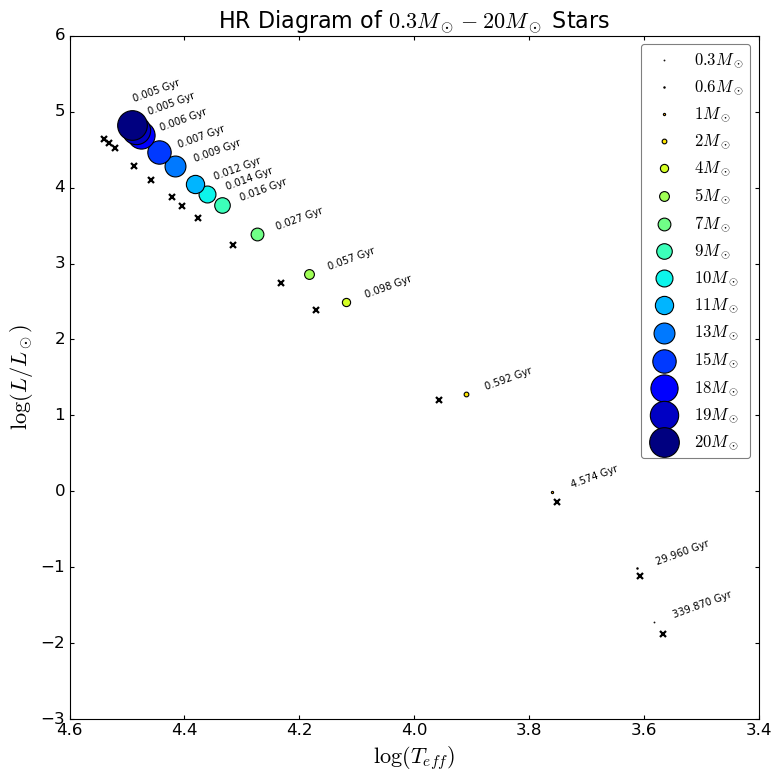

In [1535]:
sizerange = [0.3,0.6,1,2,4,5,7,9,10,11,13,15,18,19,20]
masslist = [history_03,history_06,history_1,history_2,history_4,history_5,history_7,history_9,history_10,history_11,history_13,history_15,history_18,history_19,history_20]

# initializing the colormap
cmap=plt.get_cmap('jet')
# creating an array of colors that is equal to the number of points
# originally, 0 to 1. Can be trimmed to only get certain colors
colors = [cmap(k) for k in np.linspace(0,0.85,len(sizerange))]
# in jet, the colors go from blue to red. I want red to blue
colors= colors[::-1]


plt.figure(figsize=(10,10),facecolor="white")

for j in range(len(masslist)): 
    
    # HR diagram plotting
    plt.scatter(masslist[j].log_Teff[-1], masslist[j].log_L[-1], marker="o", s=masslist[j].radius[-1]*sizerange[j]*4, label=fr'${sizerange[j]} M_\odot$',c=colors[j])
    plt.plot(masslist[j].log_Teff[0],masslist[j].log_L[0], "x", markersize=6, color='k',mew=2)
    
    # plot style modifications
    plt.xlabel(r'$\log (T_{eff})$',  fontsize=20)
    plt.ylabel(r'$\log \left( L/L_\odot \right)$', fontsize=20)
    plt.title(r'HR Diagram of $0.3M_\odot - 20M_\odot$ Stars', fontsize=20)
    plt.tick_params(axis="x", direction="in", length=4, width=1, color="black")
    plt.tick_params(axis="y", direction="in", length=4, width=1, color="black")
    plt.gca().invert_xaxis()
    
    # plot legend
    plt.legend(fancybox=True,framealpha=0.5,loc='best', scatterpoints=1,prop={'size':15})
    plt.tight_layout()

# labelling the years
# i guess you could just do a forloop...
for x,y in zip(masslist,masslist):
    label = f'{x.star_age[-1]/(10**9):0.3f} Gyr'
    
    # some fudging to attain good text position without overlap
    if x.star_age[-1] == 5126631.966654304:
        plt.annotate(label, (x.log_Teff[-1], y.log_L[-1]+0.3) ,rotation=20,ha='left',size=9)
    elif x.star_age[-1] == 5368877.992633442:
        plt.annotate(label, (x.log_Teff[-1]-.02, y.log_L[-1]+0.2) ,rotation=20,ha='left',size=9)
    else:
        plt.annotate(label, (x.log_Teff[-1]-.03, y.log_L[-1]+.05) ,rotation=20,ha='left',size=9)

plt.savefig('HR Diagram.png')
plt.show()


2) A plot that shows where the internal convection and radiation zones are for each star


In [715]:
masses = np.log10([0.3,0.6,1,2,4,5,7,9,10,11,13,15,18,19,20])
from matplotlib.lines import Line2D


In [2061]:
cmap2(1)

(0.00392156862745098, 0.5019607843137255, 0.4, 1.0)

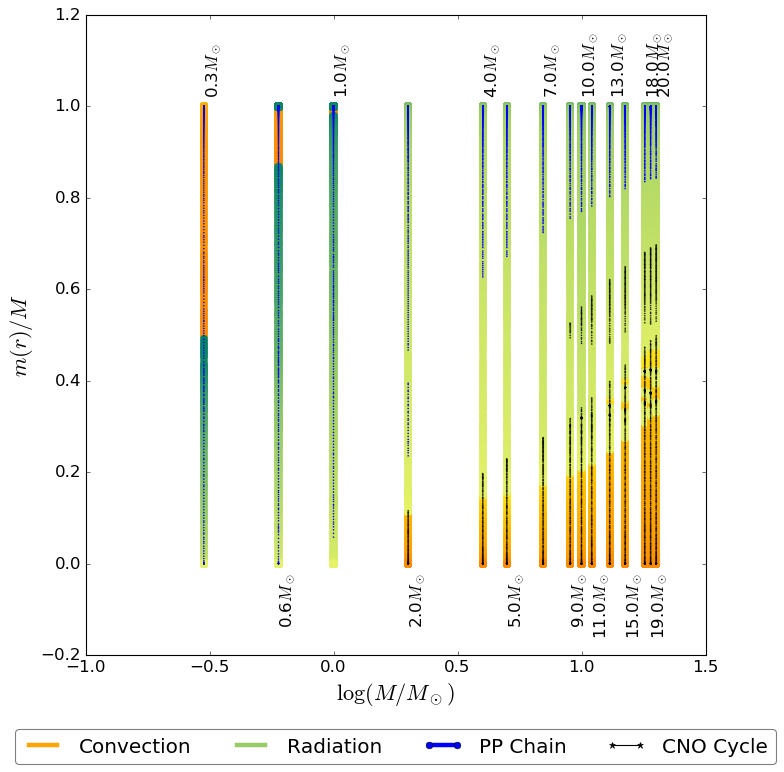

In [2066]:
cmap=plt.get_cmap('Wistia')
cmap2 = plt.get_cmap('summer')

custom_lines = [Line2D([0], [0], color='orange', lw=4,label = 'Convection'),
                Line2D([0], [0], color=cmap2(150), lw=4, label='Radiation'),
               Line2D([0], [0], color='b',marker='o', lw=4, label='PP Chain'),
               Line2D([0], [0], marker='*', color='k', label='CNO Cycle')]

fig=plt.figure(figsize=(10,10),facecolor="white")
ax = plt.subplot()

for j in range(len(10**masses)):
    redorder_r = proflist[j].gradr
    redorder_c = proflist[j].grada
    ppch = proflist[j].pp
    cnoch = proflist[j].cno 
    epsnuc = proflist[j].eps_nuc
    stable = proflist[j].sch_stable
       

    
    # Schwarzchild ratio
    sc = redorder_r/redorder_c
    
    # variable that states that 1 if grada > gradr, 0 otherwise
    # gradr > grada, convection
    # grada > gradr, radiative
    scih = np.where(stable == 0)
    radi = np.where(stable==1)
    
    
    
    # pp vs cno cycle dominent
    ppdom = np.where((ppch)*0.01 > cnoch)
    cnodom =np.where(ppch < cnoch)

    #color maps normalized to how many elements are inside the conection and radiative array
    colors = [cmap(k) for k in np.linspace(0,0.9,len(sc[scih]),endpoint=True)]
    color_rad = [cmap2(k) for k in np.linspace(0,0.9,len(sc[radi]),endpoint=True)]    
    
    
    # mass array that is the same size as the other arrays
    x_arry = np.full(len(proflist[j].mass), masses[j])
    # interior masses. 0 to 1
    interior_mass = (proflist[j].mass/10**masses[j])
    
    
    # plotting
    x1 = plt.scatter(x_arry[scih],interior_mass[scih],marker='s',s=4,linewidths=5,edgecolor='face',color=colors)
    #plt.colorbar(x1)

    x2 = plt.scatter(x_arry[radi],interior_mass[radi],marker='s',s=4,linewidths=5,edgecolor='face',color=color_rad)
    #plt.colorbar(x2)


    plt.scatter(x_arry[cnodom],interior_mass[cnodom],marker='*',s=5,linewidths=10,edgecolor='None',color='k')
    plt.scatter(x_arry[ppdom],interior_mass[ppdom],marker='o' ,s=2,linewidths=1,edgecolor='None',color='blue')

    
    if j%2==0:
        y_level = 1.02
        va = "bottom"
        plt.text(masses[j], y_level, fr"{10**masses[j]:0.1f}$M_\odot$",rotation=90,va=va)

    else:
        y_level = -0.02
        va = "top"
        plt.text(masses[j], y_level, fr"{10**masses[j]:0.1f}$M_\odot$",rotation=90,va=va)

        
    plt.legend(handles=custom_lines,fancybox=True,framealpha=0.5,scatterpoints=1,markerscale=1.,loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)
    plt.xlabel(r'$\log (M/M_\odot)$',  fontsize=20)
    plt.ylabel(r'$m(r)/M$', fontsize=20)
    #plt.title(r'', fontsize=20)
    #plt.tight_layout()
    
    #plt.xlim(-0.6,1.2)
    plt.ylim(-0.2,1.2)
    plt.savefig('Convection_Radiative_Layers_M.pdf', bbox_inches='tight')
plt.show()

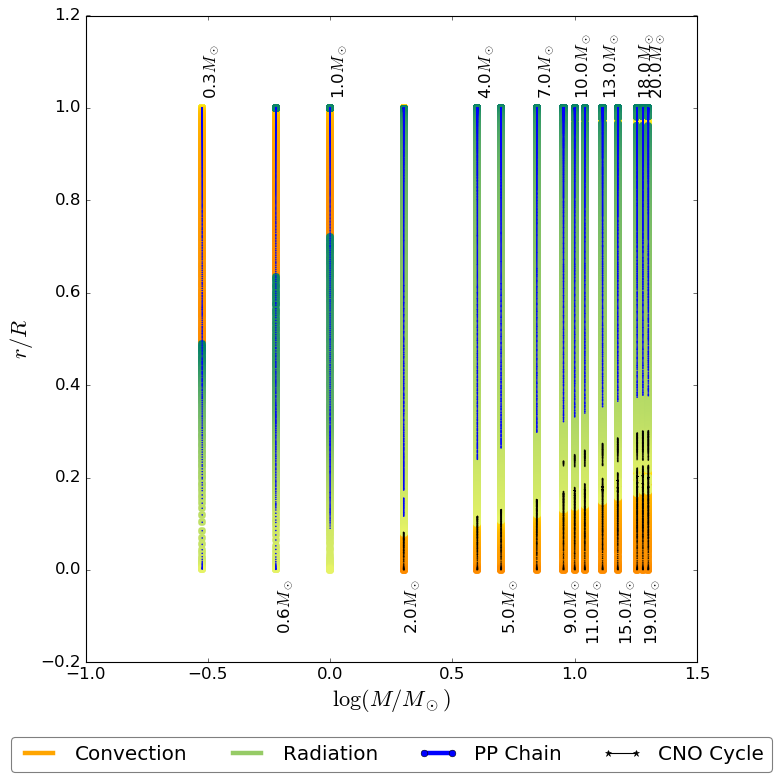

In [2067]:
cmap=plt.get_cmap('Wistia')
cmap2 = plt.get_cmap('summer')


custom_lines = [Line2D([0], [0], color='orange', lw=4,label = 'Convection'),
                Line2D([0], [0], color=cmap2(150), lw=4, label='Radiation'),
               Line2D([0], [0], color='b',marker='o', lw=4, label='PP Chain'),
               Line2D([0], [0], marker='*', color='k', label='CNO Cycle')]


fig=plt.figure(figsize=(10,10),facecolor="white")
ax = plt.subplot()

for j in range(len(10**masses)):
    redorder_r = proflist[j].gradr
    redorder_c = proflist[j].grada
    ppch = proflist[j].pp
    cnoch = proflist[j].cno 
    epsnuc = proflist[j].eps_nuc
    stable = proflist[j].sch_stable
       

    
    # Schwarzchild ratio
    sc = redorder_r/redorder_c
    
    # variable that states that 1 if grada > gradr, 0 otherwise
    # gradr > grada, convection
    # grada > gradr, radiative
    scih = np.where(stable == 0)
    radi = np.where(stable==1)
    
    
    
    # pp vs cno cycle dominent
    ppdom = np.where((ppch)*0.01 > cnoch)
    cnodom =np.where(ppch < cnoch)

    #color maps normalized to how many elements are inside the conection and radiative array
    colors = [cmap(k) for k in np.linspace(0,0.9,len(sc[scih]),endpoint=True)]
    color_rad = [cmap2(k) for k in np.linspace(0,0.9,len(sc[radi]),endpoint=True)]    
    
    
    # mass array that is the same size as the other arrays
    x_arry = np.full(len(proflist[j].mass), masses[j])
    # interior masses. 0 to 1
    interior_radius = proflist[j].radius/ max(proflist[j].radius)
    interior_radius[::-1]
    
    
    # plotting
    plt.scatter(x_arry[scih],interior_radius[scih],marker='s',s=4,linewidths=5,edgecolor='face',color=colors)
    
    plt.scatter(x_arry[radi],interior_radius[radi],marker='s',s=4,linewidths=5,edgecolor='face',color=color_rad)
   

    plt.scatter(x_arry[cnodom],interior_radius[cnodom],marker='*',s=5,linewidths=10,edgecolor='None',color='k')
    plt.scatter(x_arry[ppdom],interior_radius[ppdom],marker='o' ,s=2,linewidths=1,edgecolor='None',color='blue')

    
    if j%2==0:
        y_level = 1.02
        va = "bottom"
        plt.text(masses[j], y_level, fr"{10**masses[j]:0.1f}$M_\odot$",rotation=90,va=va)

    else:
        y_level = -0.02
        va = "top"
        plt.text(masses[j], y_level, fr"{10**masses[j]:0.1f}$M_\odot$",rotation=90,va=va)

        
    plt.legend(handles=custom_lines,fancybox=True,framealpha=0.5,scatterpoints=1,markerscale=1.,loc=9, bbox_to_anchor=(0.5, -0.1), ncol=4)

    plt.xlabel(r'$\log (M/M_\odot)$',  fontsize=20)
    plt.ylabel(r'$r/R$', fontsize=20)
    #plt.title(r'', fontsize=20)
    plt.tight_layout()
    
    #plt.xlim(-0.6,1.2)
    plt.ylim(-0.2,1.2)
    
    plt.savefig('Convection_Radiative_Layers_R.pdf', bbox_inches='tight')
plt.show()

In [2075]:
prof_19.logT[::-1],prof_19.logT

(array([7.56641994, 7.56641656, 7.56641254, ..., 4.48654334, 4.48586949,
        4.48540401]),
 array([4.48540401, 4.48586949, 4.48654334, ..., 7.56641254, 7.56641656,
        7.56641994]))

In [ ]:
def norm(data):
    return (data)/(max(data)-min(data))

5) Pick two of your models. One should be M∗ ≤ 1.1M⊙ and one M∗ ≥ 3M⊙. For each of these 2 models you will make 2 more plots, so 4 in total here. One of the plots for each mass should have the three quantities ∇, ∇ad, and ∇rad plotted as a function of interior log T, but reversed, so log T decreases to the right. The other plot for each mass will be the Brunt-Väisälä frequency (squared), or N^2
in appropriate units as a function too of reversed log T. Make sure it’s scaled properly as to be visible.
[10pts]

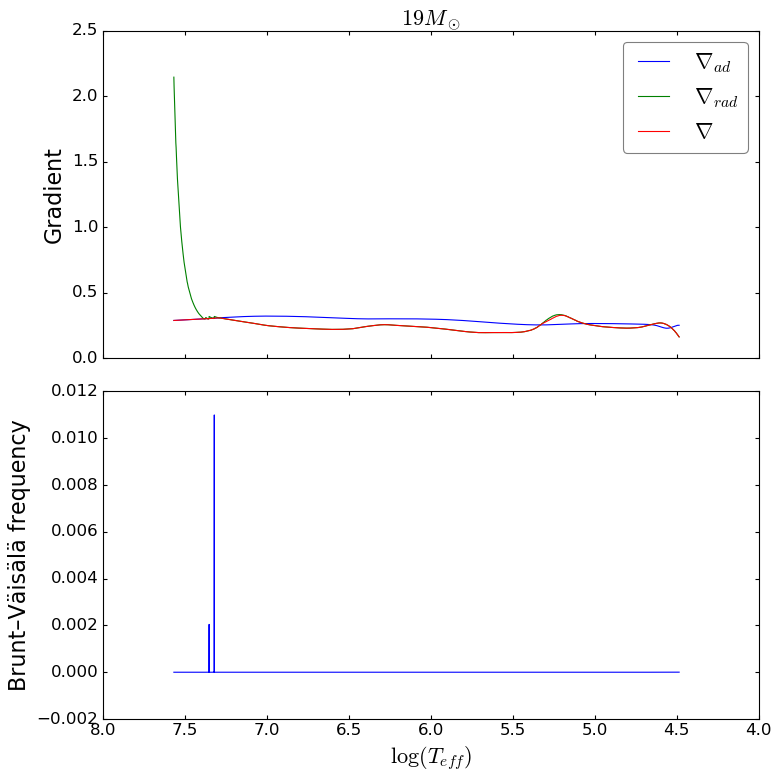

In [2090]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

# plotting the different gradients
# ∇ is the actual temperature gradient
# ∇_rad is the radiative temperature gradient
# ∇_ad is the adibatic tmeperature gradient
axs[0].invert_xaxis()
axs[0].plot(prof_19.logT,prof_19.grada, label=r'$\nabla_{ad}$')
axs[0].plot(prof_19.logT,prof_19.gradr, label=r'$\nabla_{rad}$')
axs[0].plot(prof_19.logT,prof_19.gradT, label=r'$\nabla$')

# plot modifications
axs[0].set_title(r'$19M_\odot$', fontsize=20)
axs[0].set_ylabel('Gradient',  fontsize=20)
axs[0].legend(fancybox=True,framealpha=0.5,loc='best',prop={'size':20})
axs[0].tick_params(axis="x", direction="in", length=4, width=1, color="black")
axs[0].tick_params(axis="y", direction="in", length=4, width=1, color="black")

# plotting the different Brunt-Väisälä frequency 
axs[1].invert_xaxis()
axs[1].invert_xaxis()

axs[1].plot(prof_19.logT,prof_19.brunt_N2)

# plot modigications
axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)
axs[1].set_ylabel('Brunt–Väisälä frequency',  fontsize=20)
axs[1].tick_params(axis="x", direction="in", length=4, width=1, color="black")
axs[1].tick_params(axis="y", direction="in", length=4, width=1, color="black")

plt.tight_layout()
plt.savefig('19solarmass_gradient_Nsquared')
plt.show()


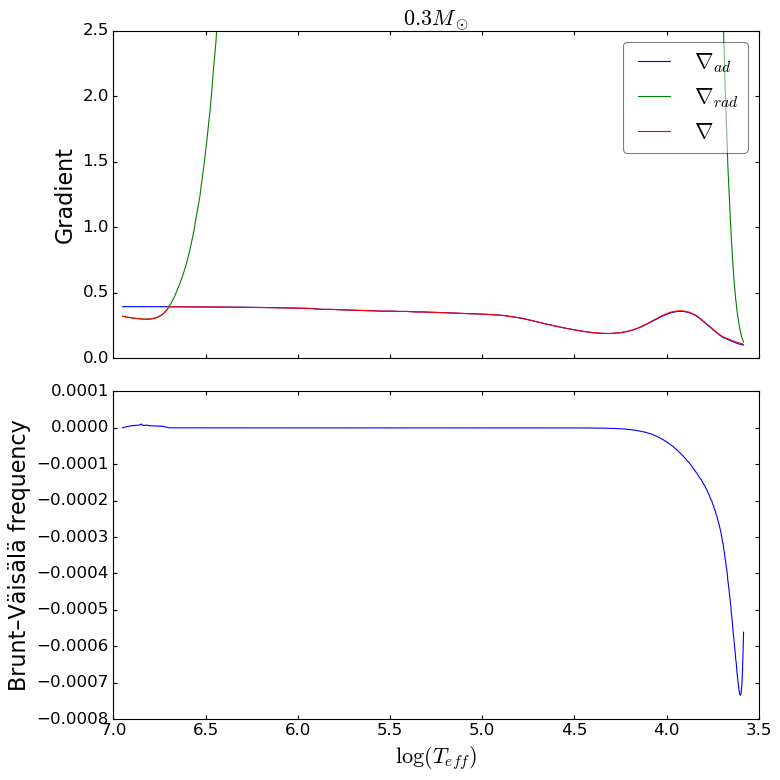

In [2104]:
fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

# plotting the different gradients
# ∇ is the actual temperature gradient
# ∇_rad is the radiative temperature gradient
# ∇_ad is the adibatic tmeperature gradient
axs[0].invert_xaxis()
axs[0].invert_xaxis()

axs[0].plot(prof_03.logT,prof_03.grada, label=r'$\nabla_{ad}$')
axs[0].plot(prof_03.logT,prof_03.gradr, label=r'$\nabla_{rad}$')
axs[0].plot(prof_03.logT,prof_03.gradT, label=r'$\nabla$')

# plot modifications

axs[0].set_ylabel('Gradient',  fontsize=20)
axs[0].set_title(r'$0.3M_\odot$', fontsize=20)
axs[0].legend(fancybox=True,framealpha=0.5,loc=1,prop={'size':20})
axs[0].tick_params(axis="x", direction="in", length=4, width=1, color="black")
axs[0].tick_params(axis="y", direction="in", length=4, width=1, color="black")
axs[0].set_ylim([0,2.5])

# plotting the different Brunt-Väisälä frequency 

axs[1].invert_xaxis()

axs[1].plot(prof_03.logT[::-1],prof_03.brunt_N2[::-1])

# plot modifications
axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)
axs[1].set_ylabel('Brunt–Väisälä frequency',  fontsize=20)
axs[1].tick_params(axis="x", direction="in", length=4, width=1, color="black")
axs[1].tick_params(axis="y", direction="in", length=4, width=1, color="black")

plt.tight_layout()
plt.savefig('03solarmass_gradient_Nsquared')
plt.show()


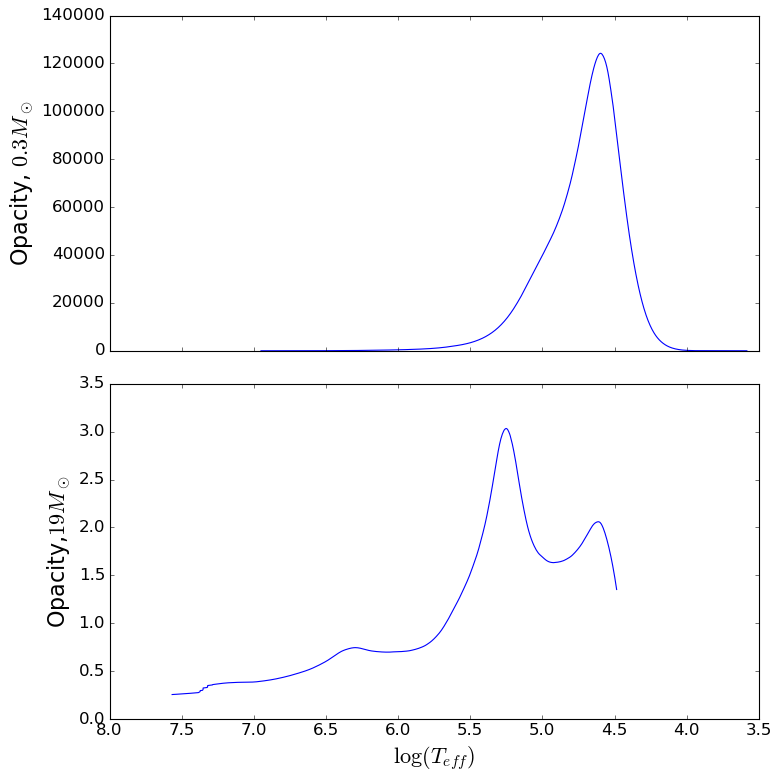

In [2167]:

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

axs[0].invert_xaxis()
axs[0].invert_xaxis()

axs[0].plot(prof_03.logT,prof_03.opacity, label=r'$0.3M_\odot$ opacity')
axs[0].set_ylabel(r'Opacity, $0.3M_\odot$',  fontsize=20)


axs[1].invert_xaxis()
axs[1].plot(prof_19.logT,prof_19.opacity, label=r'$19M_\odot$ opacity')
axs[1].set_ylabel(r'Opacity,$19M_\odot$',  fontsize=20)

axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)

plt.tight_layout()
plt.savefig('Opacity')
plt.show()


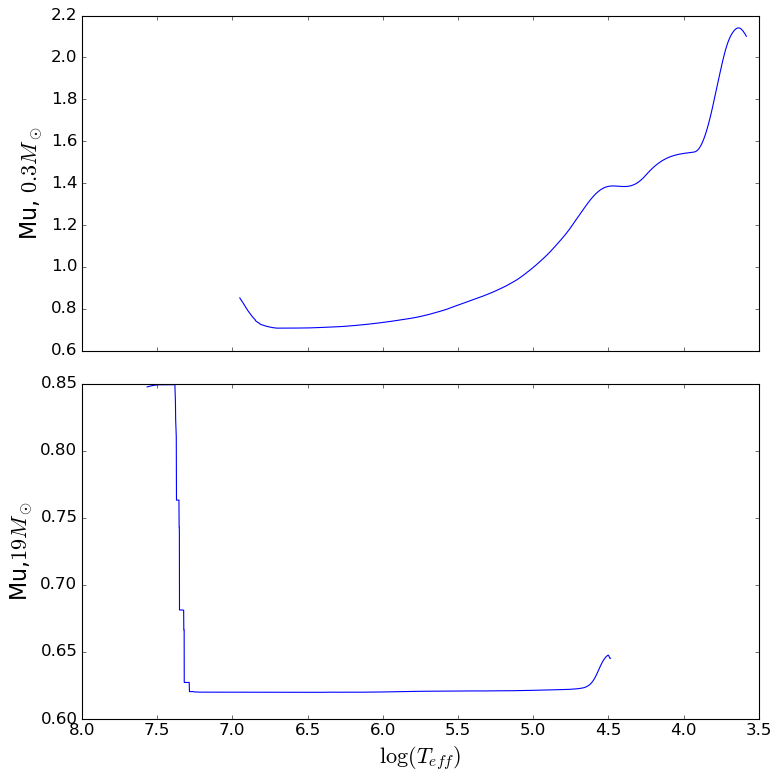

In [2166]:

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

axs[0].invert_xaxis()
axs[0].invert_xaxis()

axs[0].plot(prof_03.logT,prof_03.mu, label=r'$0.3M_\odot$ opacity')
axs[0].set_ylabel(r'Mu, $0.3M_\odot$',  fontsize=20)


axs[1].invert_xaxis()
axs[1].plot(prof_19.logT,prof_19.mu, label=r'$19M_\odot$ opacity')
axs[1].set_ylabel(r'Mu,$19M_\odot$',  fontsize=20)

axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)

plt.tight_layout()
plt.savefig('Mu.png')


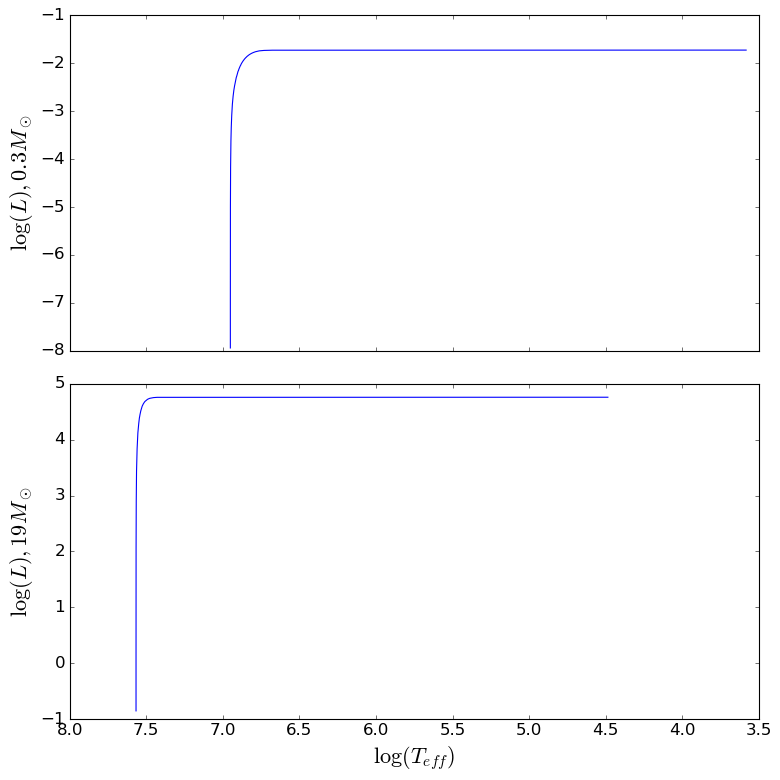

In [2163]:

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

axs[0].invert_xaxis()
axs[0].invert_xaxis()

axs[0].plot(prof_03.logT,prof_03.logL, label=r'$0.3M_\odot$ opacity')
axs[0].set_ylabel(r'$\log(L), 0.3M_\odot$',  fontsize=20)


axs[1].invert_xaxis()
axs[1].plot(prof_19.logT,prof_19.logL, label=r'$19M_\odot$ opacity')
axs[1].set_ylabel(r'$\log(L), 19M_\odot$',  fontsize=20)

axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)

plt.tight_layout()


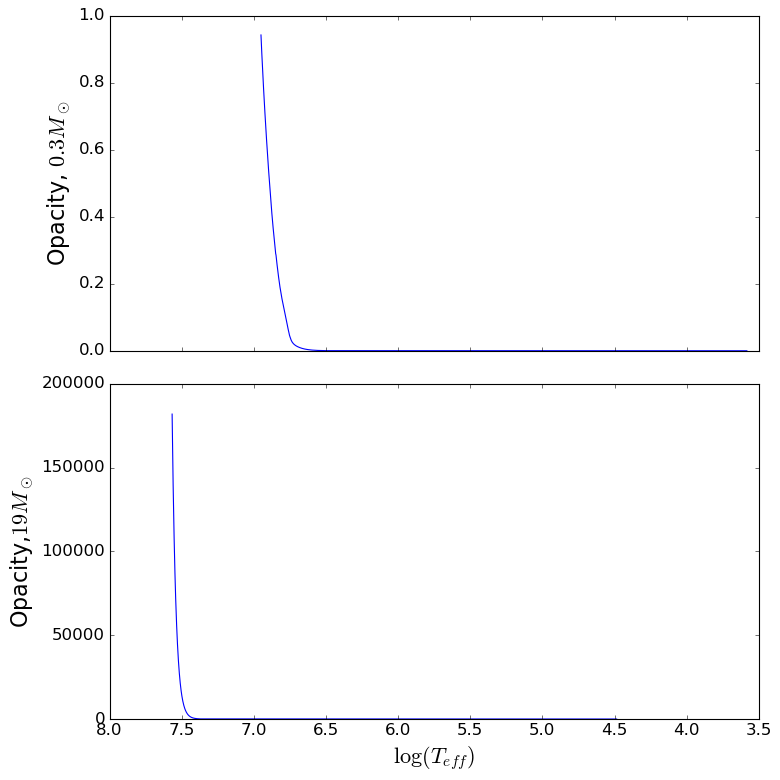

In [2165]:

fig, axs = plt.subplots(nrows=2, ncols=1,figsize=(10,10),sharex=True, facecolor='white')

axs[0].invert_xaxis()
axs[0].invert_xaxis()

axs[0].plot(prof_03.logT,prof_03.eps_nuc, label=r'$0.3M_\odot$ opacity')
axs[0].set_ylabel(r'Opacity, $0.3M_\odot$',  fontsize=20)


axs[1].invert_xaxis()
axs[1].plot(prof_19.logT,prof_19.eps_nuc, label=r'$19M_\odot$ opacity')
axs[1].set_ylabel(r'Opacity,$19M_\odot$',  fontsize=20)

axs[1].set_xlabel(r'$\log(T_{eff})$',  fontsize=20)

plt.tight_layout()
plt.savefig('Opacity')
plt.show()
